# Number Place Solver Demo

A demonstration ckeck configuration, training logs and inference

In [1]:
from lib.core import Trainer
from lib.config import load_config

## Visualize configurations

In [2]:
cfg = load_config('experiments/resnet.yaml')
trainer = Trainer(cfg=cfg)
print(trainer.cfg)

DATASET:
  BATCH_SIZE: 4
  NAME: NumberPlaceDataset
  NUM_CLASSES: 10
  ROOT: ../data/NumberPlaceDataset
  TOTAL_EPOCH: 10000
MODEL:
  CRITERION: CrossEntropyLoss
  INPUT_SIZE: (28, 28)
  LOG_DIR: ../logs
  NAME: ResNet-18
  OPTIMIZER: SGD
  PRETRAINED: https://download.pytorch.org/models/resnet18-f37072fd.pth
SCHEDULER:
  LR_MIN: 1e-06
  NAME: CosineLRScheduler
  WARMUP_LR_INIT: 1e-07
  WARMUP_PREFIX: True
  WARMUP_T: 1000


## Visualize train logs in TensorBoard

In [3]:
%load_ext tensorboard
%tensorboard  --logdir logs

# Inference

In [4]:
import cv2
import matplotlib.pyplot as plt
from lib.core import CutOuter, Detector, Solver

In [5]:
cutouter = CutOuter(root='./data/problem', name='example.png')
cutouter.cutout(eps=0)
problem = cv2.cvtColor(cutouter.img, cv2.COLOR_BGR2RGB)

### Estimation from images

In [6]:
detector = Detector(ckpt='./logs/NumberPlaceDataset/ckpt/last_ckpt.pth')
data = detector.detect(dir='./data/problem/example')

### Solve the problem from the obtained data

In [7]:
solver = Solver()
result = solver.get_result(data)

In [8]:
img = cutouter.img
height, width = img.shape

for i, col in enumerate(data):
    for j, item in enumerate(col):
        if int(item) == 0:
            cv2.putText(
                img,
                text=str(result[i][j]),
                org=(width // 9 * j + 9, height // 9 * (i + 1) - 9),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 255, 0),
                thickness=2,
                lineType=cv2.LINE_4
            )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Visualize the result

Text(0.5, 1.0, 'output')

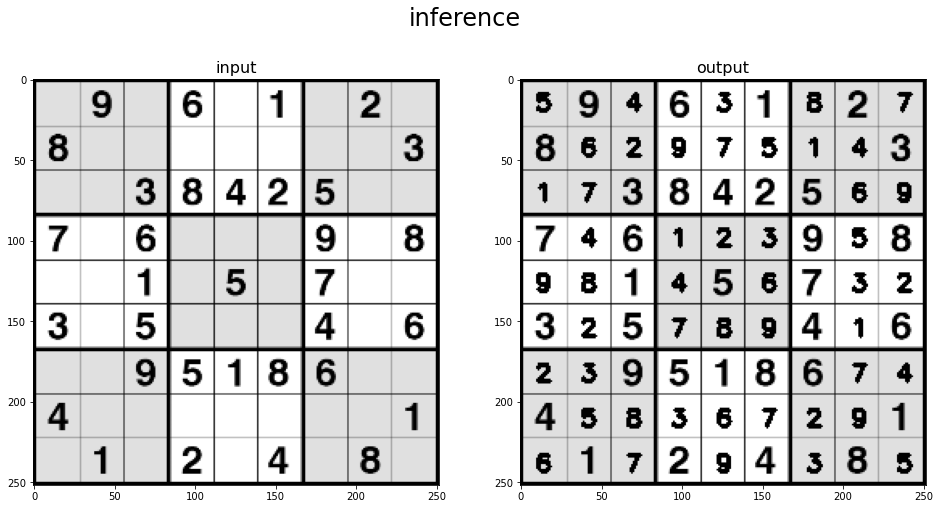

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle('inference', fontsize=24, color='black')

ax[0].imshow(problem, cmap='Greys')
ax[0].set_title('input', fontsize=16, color='black')

ax[1].imshow(img, cmap='Greys')
ax[1].set_title('output', fontsize=16, color='black')